# Necesseray libraries import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import json
!pip install Bio
from Bio import PDB
from  Bio.PDB.Polypeptide import is_aa
!pip install pandas
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parse known catalytic sites into trainable format

In [ ]:
# json Parsing
path = '/content/drive/MyDrive/לימודים/final_project/download.json'
with open(path, 'r') as f:
    data_lst = json.load(f)

# Create dictionary key: pdbId_chainName, value: list[AA_name, res_id, is_Catalytic, Chain_name]
protein_dict = dict()
protein_names_set = set()
for res in data_lst:
    try:
        chain_name = res["residue_chains"][0]["chain_name"]
        pdb_id = res["residue_chains"][0]["pdb_id"]
        protein_names_set.add(pdb_id)
        tmp_key = f"{pdb_id}_{chain_name}"
        if tmp_key not in protein_dict.keys():
            protein_dict[tmp_key] = []
        protein_dict[tmp_key].append([res["residue_chains"][0]["code"].upper(), res["residue_chains"][0]["resid"], 1, str(chain_name)])
    except Exception as e:
        continue
print(len(protein_dict.keys()))
print(protein_dict)
print(protein_names_set)

1115
{'1b73_A': [['ASP', 7, 1, 'A'], ['CYS', 70, 1, 'A'], ['CYS', 178, 1, 'A'], ['HIS', 180, 1, 'A'], ['SER', 8, 1, 'A'], ['GLU', 147, 1, 'A']], '1btl_A': [['GLU', 141, 1, 'A'], ['LYS', 209, 1, 'A'], ['ALA', 212, 1, 'A'], ['SER', 45, 1, 'A'], ['LYS', 48, 1, 'A'], ['SER', 105, 1, 'A'], ['SER', 45, 1, 'A']], '1d4a_A': [['TYR', 155, 1, 'A'], ['HIS', 161, 1, 'A'], ['GLY', 149, 1, 'A']], '1nia_A': [['ASP', 98, 1, 'A'], ['HIS', 100, 1, 'A'], ['HIS', 95, 1, 'A'], ['MET', 150, 1, 'A'], ['HIS', 145, 1, 'A'], ['HIS', 135, 1, 'A'], ['CYS', 136, 1, 'A']], '1nia_B': [['THR', 280, 1, 'B'], ['GLU', 279, 1, 'B'], ['HIS', 255, 1, 'B'], ['HIS', 306, 1, 'B']], '1whs_B': [['HIS', 127, 1, 'B'], ['ASP', 75, 1, 'B']], '1whs_A': [['TYR', 154, 1, 'A'], ['SER', 153, 1, 'A'], ['GLY', 57, 1, 'A']], '2gh5_B': [['GLU', 472, 1, 'B'], ['HIS', 467, 1, 'B']], '2gh5_A': [['LYS', 66, 1, 'A'], ['CYS', 63, 1, 'A'], ['CYS', 58, 1, 'A'], ['TYR', 197, 1, 'A'], ['GLU', 201, 1, 'A']], '5icd_A': [['TYR', 160, 1, 'A'], ['LYS', 23

# Download data for relevant proteins and add non-catalytic AA

In [ ]:
parser = PDB.PDBParser() # Load parser
pdb_list = PDB.PDBList()
protein_names_lst = list(protein_names_set) # All protein names to download

def build_dict(protein_names_set):
  '''
  Downloads all the relevant proteins data, and labeling them as not catalytic
  '''
  k=1
  for pdb_id in protein_names_set:
    print("=======================")
    print("Protein pdb_id:", pdb_id)
    print(f"Script is {(k/len(protein_names_set))*100}% ...")
    k+=1
    struct_path = pdb_list.retrieve_pdb_file(pdb_code=pdb_id, file_format='pdb')
    try:
      structure = parser.get_structure(pdb_id, struct_path)
    except Exception as e:
      continue
    for chain in structure.get_chains():
      tmp_key = f"{pdb_id}_{chain.get_id()}"
      if tmp_key in protein_dict:
        for residue in chain.get_residues():
          res_name = residue.get_resname()
          if is_aa(res_name):
            residue_id = int(residue.get_full_id()[3][1])
            if not [res_name, residue_id, 1, chain.get_id()] in protein_dict[tmp_key]:
                protein_dict[tmp_key].append([res_name, residue_id, 0, chain.get_id()])

  return

# Run function
build_dict(protein_names_lst)

Protein pdb_id: 1b6t
Script is 0.09980039920159679% ...


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2957.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2962.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3016.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3162.
  warnings.warn(


Protein pdb_id: 1cgk
Script is 0.19960079840319359% ...


KeyboardInterrupt: 

In [ ]:
print(protein_dict['1b73_A'])

[['ASP', 7, 1, 'A'], ['CYS', 70, 1, 'A'], ['CYS', 178, 1, 'A'], ['HIS', 180, 1, 'A'], ['SER', 8, 1, 'A'], ['GLU', 147, 1, 'A'], ['MET', 1, 0, 'A'], ['LYS', 2, 0, 'A'], ['ILE', 3, 0, 'A'], ['GLY', 4, 0, 'A'], ['ILE', 5, 0, 'A'], ['PHE', 6, 0, 'A'], ['GLY', 9, 0, 'A'], ['VAL', 10, 0, 'A'], ['GLY', 11, 0, 'A'], ['GLY', 12, 0, 'A'], ['LEU', 13, 0, 'A'], ['THR', 14, 0, 'A'], ['VAL', 15, 0, 'A'], ['LEU', 16, 0, 'A'], ['LYS', 17, 0, 'A'], ['ALA', 18, 0, 'A'], ['ILE', 19, 0, 'A'], ['ARG', 20, 0, 'A'], ['ASN', 21, 0, 'A'], ['ARG', 22, 0, 'A'], ['TYR', 23, 0, 'A'], ['ARG', 24, 0, 'A'], ['LYS', 25, 0, 'A'], ['VAL', 26, 0, 'A'], ['ASP', 27, 0, 'A'], ['ILE', 28, 0, 'A'], ['VAL', 29, 0, 'A'], ['TYR', 30, 0, 'A'], ['LEU', 31, 0, 'A'], ['GLY', 32, 0, 'A'], ['ASP', 33, 0, 'A'], ['THR', 34, 0, 'A'], ['ALA', 35, 0, 'A'], ['ARG', 36, 0, 'A'], ['VAL', 37, 0, 'A'], ['PRO', 38, 0, 'A'], ['TYR', 39, 0, 'A'], ['GLY', 40, 0, 'A'], ['ILE', 41, 0, 'A'], ['ARG', 42, 0, 'A'], ['SER', 43, 0, 'A'], ['LYS', 44, 0, 'A'

# Sort dictionary and remove non-AA residues

In [ ]:
from Bio.PDB.Polypeptide import *
for protein in protein_dict.keys():
  lst = protein_dict[protein]
  protein_dict[protein] = sorted(lst, key= lambda x:x[1]) # Sort by res_id
  for aa in protein_dict[protein]:
    i = aa[0]
    try:
      # Turn AA from three to one format or delete if not AA (Ex. HOH or CA)
      aa[0] = three_to_index(str(i))
      aa[0] = index_to_one(aa[0])
    except Exception as e:
      protein_dict[protein].remove(aa)

# Save or load dictionray to json format

In [ ]:
file_path = '/content/drive/MyDrive/לימודים/final_project/protein_dict1.json'

def load_dict(path='/content/drive/MyDrive/לימודים/final_project/protein_dict.json'):
  with open(file_path, 'r') as f:
    protein_dict = json.load(f)

def save_dict(path='/content/drive/MyDrive/לימודים/final_project/protein_dict1.json'):
  with open(file_path, 'w') as f:
      json.dump(protein_dict, f, indent=4)

with open(file_path, 'r') as f:
  protein_dict = json.load(f)


In [ ]:
print(protein_dict.keys())
print(protein_dict.keys())

dict_keys(['1b73_A', '1btl_A', '1d4a_A', '1nia_A', '1nia_B', '1whs_B', '1whs_A', '2gh5_B', '2gh5_A', '5icd_A', '1qpr_A', '1qpr_B', '5a1i_A', '1mkb_A', '1mkb_B', '1qum_A', '1oth_A', '2bbk_L', '2bbk_H', '1vnc_A', '1znb_A', '1bc2_A', '1rr6_A', '1jdw_A', '1x9d_A', '1dl2_A', '1qjd_A', '1do8_A', '1b6b_A', '1xva_A', '1nzy_A', '1nba_A', '1ptd_A', '1ah7_A', '1djx_A', '1djo_A', '1djo_B', '2pfl_A', '1lcb_A', '1qin_A', '1qin_B', '1jc5_A', '1mpy_A', '2phk_A', '1qq5_A', '5cox_A', '1fbx_A', '2mas_A', '13pk_A', '1dnk_A', '1ql0_A', '4kbp_A', '1alk_A', '1cdg_A', '2adm_A', '1ytw_A', '1bzy_A', '1pya_E', '1pya_A', '1pya_F', '1dbt_A', '1dbt_B', '1aq2_A', '1b57_A', '1n8i_A', '1d8c_A', '1qfe_A', '1gu1_A', '1ze1_A', '2ahj_A', '2ahj_B', '1cju_B', '1cju_A', '1dqs_A', '1dqs_B', '1dea_A', '1bjp_B', '1bjp_A', '1req_A', '1cb7_A', '1cb7_B', '1d6m_A', '1gim_A', '1daa_A', '1pjb_A', '1ivh_A', '1lxa_A', '1ef8_A', '1eug_A', '2fua_A', '1dco_A', '1bs1_A', '12as_A', '1a26_A', '1afw_A', '1al6_A', '1d0s_A', '1c3c_B', '1c3c_A',

# Create CATH dictionary with key: CATH_ID, value: All proteins with same CATH_ID

Load CATH data

In [ ]:
file_path = '/content/drive/MyDrive/לימודים/final_project/cath_domain_list_new.txt'
cath_df = pd.read_csv(file_path, sep="\t") # Load CATH DB to pandas.DataFrame
cath_df = cath_df[['CATH_domain_name', 'Class_number', 'Architecture_number', 'Topology_number', 'Homologous_superfamily_number']]
cath_df["new_format"] = cath_df["CATH_domain_name"].str[:-2]
cath_df['cath_id'] = cath_df[['Class_number', 'Architecture_number', 'Topology_number', 'Homologous_superfamily_number']].apply(lambda row: '.'.join(map(str, row)), axis=1)
print(cath_df.head(10))


  CATH_domain_name  Class_number  Architecture_number  Topology_number  \
0          1oaiA00             1                   10                8   
1          1go5A00             1                   10                8   
2          3frhA01             1                   10                8   
3          3friA01             1                   10                8   
4          3b89A01             1                   10                8   
5          4g3oA00             1                   10                8   
6          4heoA00             1                   10                8   
7          4heoB00             1                   10                8   
8          1oksA00             1                   10                8   
9          4wp2F00             1                   10                8   

   Homologous_superfamily_number new_format    cath_id  
0                             10      1oaiA  1.10.8.10  
1                             10      1go5A  1.10.8.10  
2             

Create Dictionary

In [ ]:
cath_dict = dict()
for key in protein_dict.keys():
  prot_chain = key.replace("_", "")
  all_rows = cath_df[cath_df["new_format"] == prot_chain]
  if all_rows.size == 0:
    continue
  row = all_rows.iloc[0]
  if row["cath_id"] not in cath_dict.keys():
    cath_dict[row["cath_id"]] = []
  cath_dict[row["cath_id"]].append(prot_chain)

print(cath_dict)
print("done")

{'3.40.50.1860': ['1b73A', '1jflA', '5hrcA'], '3.40.710.10': ['1btlA', '1m6kA', '1xx2A', '1ci8A'], '3.40.50.360': ['1d4aA', '1ycfA'], '2.60.40.420': ['1niaA', '1niaB', '2b3iA', '2qt6A'], '3.40.50.11320': ['1whsB'], '3.40.50.1820': ['1whsA', '1sc9A', '1a7uA', '1a8qA', '1gxsA', '1aqlA', '2o7rA', '1azwA', '1b6gA', '1bs9A', '1c4xA', '1jkmA', '1cv2A', '1dinA', '1r4zA', '1tahB', '1thgA', '1eh5A', '1pjaA', '1kezA', '1agyA', '1thtA', '1zoiA', '1uk7A', '1ehyA', '1l7aA', '1qe3A', '1mahA'], '3.30.390.30': ['2gh5B', '2gh5A', '1zk7A', '1mokB', '1mokA', '2npxA'], '3.40.718.10': ['5icdA', '1a05B', '1a05A'], '3.20.20.70': ['1qprA', '1qprB', '1dbtA', '1dbtB', '1b57A', '1qfeA', '1ps9A', '1d3gA', '2tmdA', '1onrA', '2qutA', '1gzgA', '1q6lA', '1q6lB', '1ho1A', '1igsA', '1dhpA', '1dhpB', '1h1zA', '1oyaA', '1tph1', '1lbmA', '2a5hA', '2tpsA', '1a50A', '1fq0A', '1fdyA', '1p1xA', '1q3nA', '1fcqA', '2hsaA', '2a0nA', '1r30A', '1goxA', '4njkA', '3c2eA', '2bleA'], '3.30.300.10': ['5a1iA', '1gpmA'], '3.10.129.10': [

# Create CSR matrix (graph) with labels

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import numpy as np

protein_lst = list(protein_dict.keys())
matrix_graph = csr_matrix((len(protein_lst), len(protein_lst)), dtype=np.int8)
for domain in cath_dict.keys():
  for protein_1 in cath_dict[domain]:
    protein_1 = protein_1[:-1]+ "_" + protein_1[-1]
    index_1 = protein_lst.index(protein_1)
    for protein_2 in cath_dict[domain]:
      protein_2 = protein_2[:-1]+ "_" + protein_2[-1]
      index_2 = protein_lst.index(protein_2)
      matrix_graph[index_1, index_2] = 1

n_components, labels = connected_components(csgraph=matrix_graph, directed=False, return_labels=True)
labels = labels.tolist()


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


# Create a partition to validation, test and train sets

In [ ]:
import random
random.seed(10)
label_portion = [(labels.count(labels[i])/1115, labels[i] ,i) for i in range(1115)]
print(label_portion)
mx_sums = [0.6, 0.2, 0.2]
exceed = 0.03
groups = [[], [], []]
sums = [0, 0, 0]
remaining_numbers = label_portion.copy()
random.shuffle(remaining_numbers)
for i in range(n_components):
  tup = remaining_numbers[0]
  for j in range(3):
    if sums[j] + tup[0] < mx_sums[j] + exceed:
      sums[j] += tup[0]
      for tup2 in remaining_numbers:
        if tup2[1] == tup[1]:
          groups[j].append(tup2[2])
          remaining_numbers.remove(tup2)
      break
print(groups)
print(len(groups[0])+len(groups[1])+len(groups[2]))
print(len(groups[0]),len(groups[1]),len(groups[2]))
print(sums)
print(sum(sums))


[(0.0026905829596412557, 0, 0), (0.003587443946188341, 1, 1), (0.0017937219730941704, 2, 2), (0.003587443946188341, 3, 3), (0.003587443946188341, 3, 4), (0.0008968609865470852, 4, 5), (0.025112107623318385, 5, 6), (0.0053811659192825115, 6, 7), (0.0053811659192825115, 6, 8), (0.0026905829596412557, 7, 9), (0.033183856502242155, 8, 10), (0.033183856502242155, 8, 11), (0.0017937219730941704, 9, 12), (0.004484304932735426, 10, 13), (0.004484304932735426, 10, 14), (0.003587443946188341, 11, 15), (0.0017937219730941704, 12, 16), (0.0008968609865470852, 13, 17), (0.0017937219730941704, 14, 18), (0.0017937219730941704, 15, 19), (0.003587443946188341, 16, 20), (0.003587443946188341, 16, 21), (0.006278026905829596, 17, 22), (0.0017937219730941704, 18, 23), (0.004484304932735426, 19, 24), (0.004484304932735426, 19, 25), (0.0008968609865470852, 20, 26), (0.030493273542600896, 21, 27), (0.003587443946188341, 22, 28), (0.0008968609865470852, 23, 29), (0.007174887892376682, 24, 30), (0.0026905829596

# Delete double amino acids

In [ ]:
remove_element =[]
for key in protein_dict.keys():
  remove_element =[]
  last=protein_dict[key][0]
  for i in range(1,len(protein_dict[key])):
    new_res = protein_dict[key][i]
    if new_res[1] == last[1]:
      if (last[2] == 1 and new_res[2] == 0) or (last[2] == new_res[2]):
        remove_element.append(new_res)
      elif last[2] == 0 and new_res[2] == 1:
        remove_element.append(last)
    else:
      last = new_res
  for element in remove_element:
    protein_dict[key].remove(element)


# Partition of the data to train, test, validation

In [ ]:
train_lst = [protein_lst[k] for k in groups[0]]
test_lst = [protein_lst[k] for k in groups[1]]
validation_lst = [protein_lst[k] for k in groups[2]]
def make_txt(file_name, lst):
  '''
  Transfer data from list to ScanNet input format and save text file
  '''
  txt =""
  for protein in lst:
    txt+=f">{protein}\n"
    prot_lst = protein_dict[protein]
    for res in prot_lst:
      txt += f"{res[3]}\t{res[1]}\t{res[0]}\t{res[2]}\n"
  txt = txt[:-1]
  file_path = f'/content/drive/MyDrive/לימודים/final_project/{file_name}.txt'
  with open(file_path, 'w') as f:
    f.write(txt)
  return


#make_txt("testSeed5", test_lst)
#make_txt("validSeed5", validation_lst)
#make_txt("trainSeed5", train_lst)



# Get a list of the correct labels for all proteins

In [ ]:
true_labels = []
for k, prot in enumerate(test_lst):
  i = len(true_labels)
  true_labels.append([])
  for label in protein_dict[prot]:
    true_labels[i].append(label[2])

In [ ]:
with open("/content/drive/MyDrive/לימודים/final_project/ScanNet/prediction_and_labels_pred.txt", 'r') as file:
    txt = file.read()
    txt = txt.replace("\n", "")
    txt = txt.replace("    ", " ")
    txt = txt.replace("   ", " ")
    txt = txt.replace("  ", " ")
    split_list = txt.split(",")
    prediction = []
    # print(split_list[18][-10:])
    for i in range(len(split_list)):
        try:
            tmp_labels = split_list[i].split(" ")
            if "..." in tmp_labels:
              print("... in", i)
              continue
            tmp_arr = [float(tmp_labels[0][1:])] + [float(x) for x in tmp_labels[1:-1]] + [float(tmp_labels[-1][:-1])]
            prediction.append(tmp_arr)
        except Exception as e:
          print(i)
          print([(tmp_labels[0][1:])])
          print(True if 1 in [1 if x=="" else 0 for x in tmp_labels[1:-1]] else False)
          print([(tmp_labels[-1][:-1])])
          print(e)
          continue
all_predictions = []
for arr in prediction:
  for p in arr:
    all_predictions.append(p)
print(len(all_predictions))
print()
with open("/content/drive/MyDrive/לימודים/final_project/ScanNet/prediction_and_labels_labels.txt", 'r') as file:
    txt = file.read()
    txt = txt.replace("\n", "")
    txt = txt.replace("    ", " ")
    txt = txt.replace("   ", " ")
    txt = txt.replace("  ", " ")
    split_list = txt.split(",")
    labels = []
    # print(split_list[18][-10:])
    for i in range(len(split_list)):
        try:
            tmp_labels = split_list[i].split(" ")
            if "..." in tmp_labels:
              print("... in", i)
              continue
            tmp_arr = [int(tmp_labels[0][1:])] + [int(x) for x in tmp_labels[1:-1]] + [int(tmp_labels[-1][:-1])]
            labels.append(tmp_arr)
        except Exception as e:
          print(i)
          #print([(tmp_labels[0][1:])])
          #print(True if 1 in [1 if x=="" else 0 for x in tmp_labels[1:-1]] else False)
          #print([(tmp_labels[-1][:-1])])
          #print(e)
          continue
all_labels = []
for arr in labels:
  for p in arr:
    all_labels.append(p)
print(len(all_labels))

... in 14
... in 16
... in 38
... in 158
69977

... in 14
... in 16
... in 38
... in 158
214
69977


# Compare to other models

Prepare data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Split the data to valid and train like our model
x_train_aa = []
x_train_index = []
y_train = []
for prot in train_lst:
  for aa in protein_dict[prot]:
    x_train_aa.append(aa[0])
    x_train_index.append(aa[1])
    y_train.append(aa[2])

x_test_aa = []
x_test_index = []
y_test = []
for prot in test_lst:
  for aa in protein_dict[prot]:
    x_test_aa.append(aa[0])
    x_test_index.append(aa[1])
    y_test.append(aa[2])

x_valid_aa = []
x_valid_index = []
y_valid = []
for prot in validation_lst:
  for aa in protein_dict[prot]:
    x_valid_aa.append(aa[0])
    x_valid_index.append(aa[1])
    y_valid.append(aa[2])


# Convert labels to integers
le = LabelEncoder()
x_train_aa = le.fit_transform(x_train_aa)
x_test_aa = le.fit_transform(x_test_aa)
x_valid_aa = le.fit_transform(x_valid_aa)
x_train = [(x_train_aa[i],x_train_index[i]) for i in range(len(x_train_aa))]
x_test = [(x_test_aa[i],x_test_index[i]) for i in range(len(x_test_aa))]
x_valid = [(x_valid_aa[i],x_valid_index[i]) for i in range(len(x_valid_aa))]

SVM is a powerful classifier that can handle both linear and non-linear data. For your task, you can use a linear SVM if the relationship between the amino acid index and its catalytic nature is linear, or a non-linear SVM (e.g., using a Radial Basis Function (RBF) kernel) if the relationship is more complex.

In [ ]:
from sklearn import svm

# Train the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

In [ ]:
# Example prediction
for i in range(500):
  if y_valid[i]==1:
    prediction = clf.predict([x_valid[i]])
    print(prediction[0])
    print(y_valid[i])

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
# Example prediction
print(clf.predict(x_valid))
for i in range(1000):
  if y_valid[i]==1:
    prediction = clf.predict([x_valid[i]])
    print(prediction[0])
    print(y_valid[i])

[0 0 0 ... 0 0 0]
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Get best threshold for accuracy

# given max threshold calculate pre

max threshold = 0.08
[[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.560

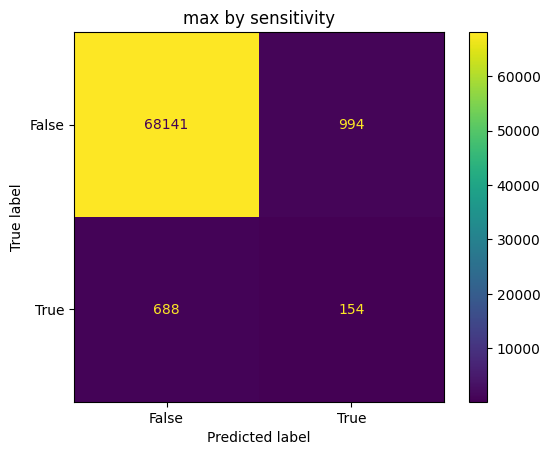

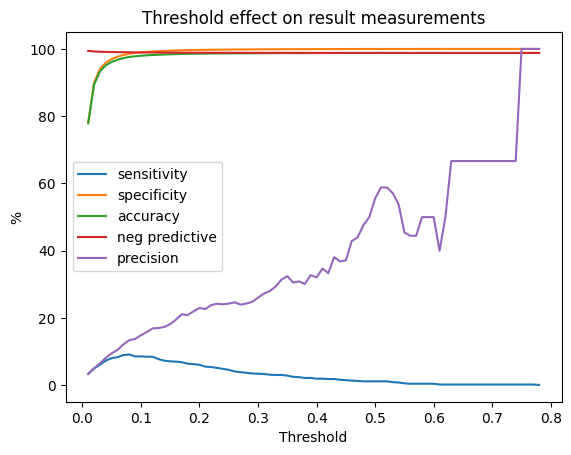

max threshold = 0.7500000000000004
[[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.550000000

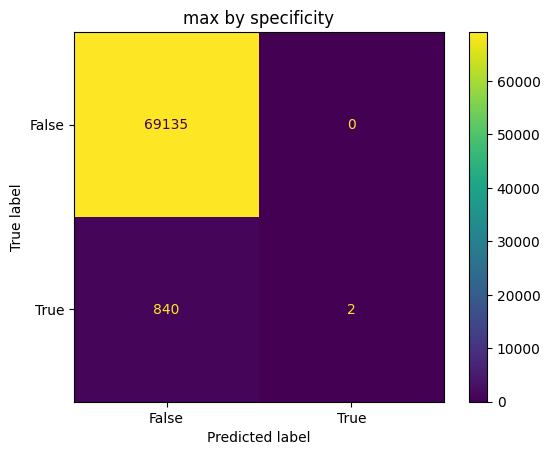

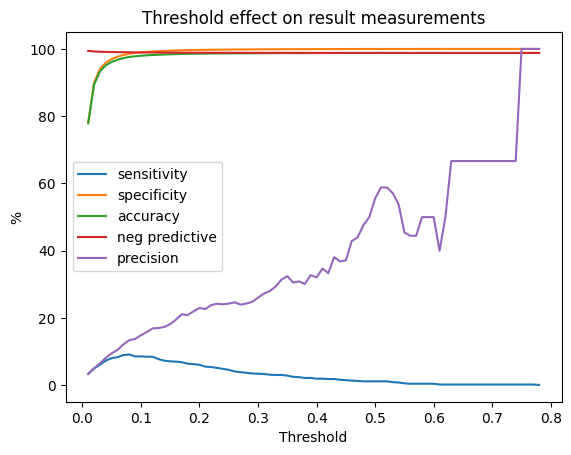

max threshold = 0.5100000000000002
[[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.550000000

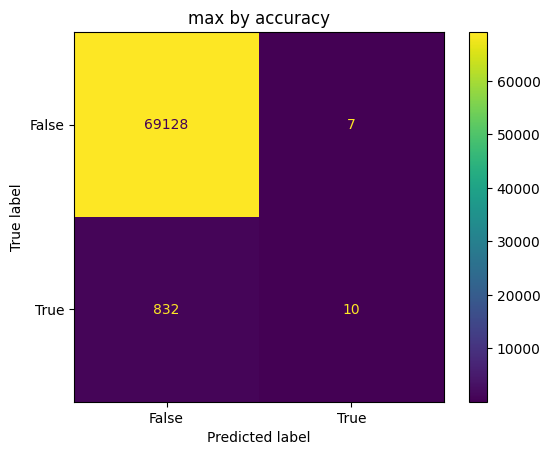

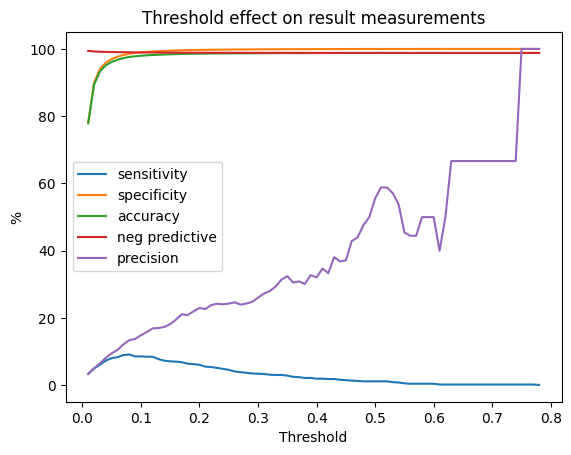

max threshold = 0.01
[[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.560

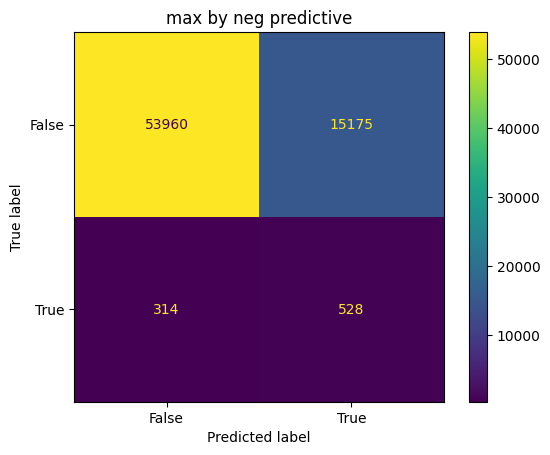

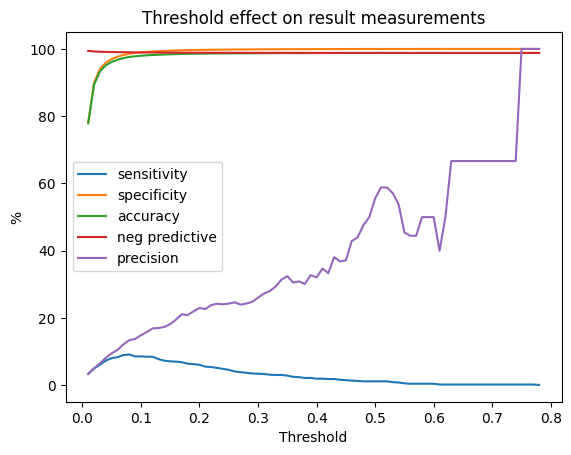

max threshold = 0.7500000000000004
[[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.550000000

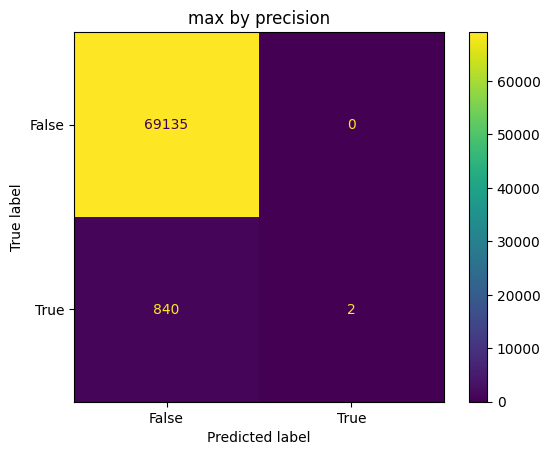

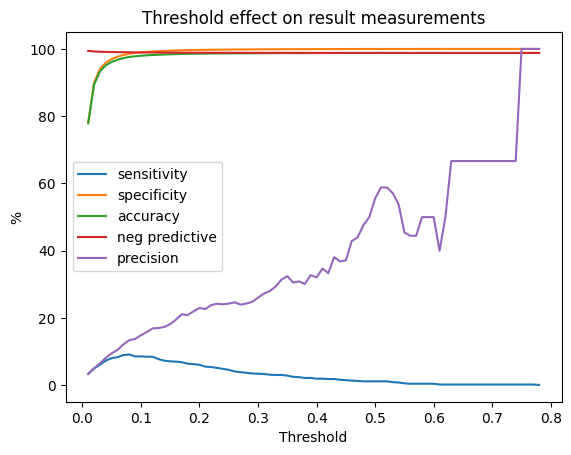

In [ ]:
def threshold_find_in_range(mn = 0, mx = 1, iter = 100, max_by = 'accuracy', true_labels = all_labels, predictions = all_predictions):
  th_graph = [[],[],[],[],[],[]]
  method = [ 'sensitivity', 'specificity', 'accuracy', 'neg predictive', 'precision']
  func_index = method.index(max_by)
  threshold = mn
  mx_threshold = mn
  mx_func = 0
  jump = (mn + mx)/iter
  n = len(predictions)
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(iter):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(n):
      if predictions[j] > threshold:
        pred = 1
      else:
        pred = 0
      if pred == true_labels[j]:
        if pred == 1:
          tp += 1
        elif pred == 0:
          tn += 1
      else:
        if pred == 1:
          fp += 1
        elif pred == 0:
          fn += 1
    try:
      func = [tp/(fn+fp), tn/(tn+fp), (tp+tn)/(tp+tn+fp+fn), tn/(tn+fn), tp/(tp+fp)]
      th_graph[0].append(threshold)
      th_graph[1].append(func[0]*100)
      th_graph[2].append(func[1]*100)
      th_graph[3].append(func[2]*100)
      th_graph[4].append(func[3]*100)
      th_graph[5].append(func[4]*100)
      if mx_func<func[func_index]:
        mx_threshold = threshold
        mx_func = func[func_index]
      threshold += jump
    except:
      threshold += jump
      continue
  for j in range(n): # get mx_threshold details
    if predictions[j] > mx_threshold:
      pred = 1
    else:
      pred = 0
    if pred == true_labels[j]:
      if pred == 1:
        tp += 1
      elif pred == 0:
        tn += 1
    else:
      if pred == 1:
        fp += 1
      elif pred == 0:
        fn += 1
  print("max threshold = "+ str(mx_threshold))
  print(th_graph)
  pred_th_recall = [1 if p>mx_threshold else 0 for p in all_predictions]
  true_labels = all_labels
  cm = confusion_matrix(true_labels,pred_th_recall)
  disp=ConfusionMatrixDisplay(cm, display_labels=['False','True'])
  pr = []
  for i in range(len(method)):
    try:
      pr.append(str(method[i]) + " = "+str([tp/(fn+fp), tn/(tn+fp), (tp+tn)/(tp+tn+fp+fn), tn/(tn+fn), tp/(tp+fp)][i]))
    except:
      pr.append(str(method[i]) + " = X")
  print(pr)
  disp.plot()
  plt.title("max by " + max_by)
  plt.show()
  print()
  # threshold graph comparison
  plt.plot(th_graph[0], th_graph[1], label="sensitivity")
  plt.plot(th_graph[0], th_graph[2], label="specificity")
  plt.plot(th_graph[0], th_graph[3], label="accuracy")
  plt.plot(th_graph[0], th_graph[4], label="neg predictive")
  plt.plot(th_graph[0], th_graph[5], label="precision")
  plt.xlabel("Threshold")
  plt.ylabel("%")
  plt.title("Threshold effect on result measurements")
  plt.legend()
  plt.show()

method = [ 'sensitivity', 'specificity', 'accuracy', 'neg predictive', 'precision']
for m in method:
  threshold_find_in_range(max_by = m)
